In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plot
import seaborn as sns

### Cargar dataset

In [2]:
df = pd.read_csv("data/attacks_clean.csv",encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,Year,Type,Country,Activity,sex,Injury,Fatal
0,0,2018,Boating,USA,Paddling,FEMALE,"No injury to occupant, outrigger canoe and pad...",NO
1,1,2018,Unprovoked,USA,Standing,FEMALE,Minor injury to left thigh,NO
2,2,2018,Invalid,USA,Surfing,MALE,Injury to left lower leg from surfboard skeg,NO
3,3,2018,Unprovoked,AUSTRALIA,Surfing,MALE,Minor injury to lower leg,NO
4,4,2018,Provoked,MEXICO,Free diving,MALE,Lacerations to leg & hand shark PROVOKED INCIDENT,NO


## HIPOTESIS 1
#### ¿LOS TIBURONES ATACAN A LOS SURFISTAS POR ERROR DE IDENTIDAD?
Vamos a intentar demostrar la teoria de que los tiburones atacan a los surfistas porque los confunden con algún animal como tortugas, focas etc

In [15]:
lista_act= ["Surfing","Swimming","Fishing"]
df_filter = df[df["Activity"].isin(lista_act)]

In [16]:
df_filter.Activity.value_counts()


Surfing     930
Swimming    847
Fishing     429
Name: Activity, dtype: int64

Filtramos a partir de 1950, ya que los datos de años anteriores son pocos y no dan información relevante

In [29]:
df_filter= df_filter[df_filter.Year>1950]

<AxesSubplot:xlabel='Year', ylabel='Density'>

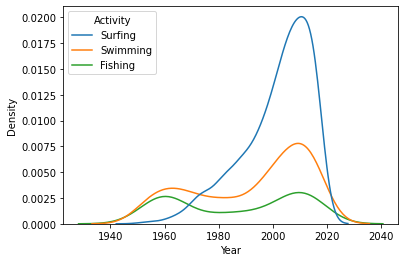

In [59]:
sns.kdeplot(x=df_filter.Year, hue=df_filter.Activity)

Si nos fijamos en el gráfico se puede apreciar como con el paso de los años se producen más ataques. Hasta 1970 las actividades que más se realizaban eran nadar y pescar, por ello el nº de ataques era superior al surf.
Pero a partir de 1970 los ataques a surfistas crece exponencialmente, debido a un incremento de personas que deciden hacer surf. 

Por tanto se podría afirmar que los tiburones confunden a los surfistas con animales, por ello les atacan más que a los nadadores.

## HIPOTESIS 2
### Ataque Fatal si eres Hombre-Mujer haciendo surf

Creo un nuevo DF con los ataques provocados haciendo surf y posteriores a 1972 y quitando los Unknown de las columnas sex y fatal

In [32]:
df_hip2 = df_filter.loc[(df_filter["Activity"] == "Surfing") & (df_filter["Year"] > 1972)]
lista_sex = ["MALE","FEMALE"]
lista_fatal = ["YES","NO"]
df_hip2 = df_hip2[df_hip2["sex"].isin(lista_sex)]
df_hip2 = df_hip2[df_hip2["Fatal"].isin(lista_fatal)]

#### Tabla resumen de ataque de tiburón si es fatal y el sexo de la persona

In [33]:
pd.crosstab(index=df_hip2["Fatal"],columns=df_hip2["sex"], margins=True)

sex,FEMALE,MALE,All
Fatal,,,
NO,47,744,791
YES,2,39,41
All,49,783,832


#### Tabla en porcentajes relativos de ataques según tu sexo
Los datos muestran que independientemente de que sea grave o no el ataque, es más probable que ocurra en hombres

In [42]:
contingencia_sexo = pd.crosstab(index=df_hip2["Fatal"], columns=df_hip2["sex"]
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)
contingencia_sexo.round(2)

sex,FEMALE,MALE
Fatal,,
NO,5.94,94.06
YES,4.88,95.12


#### Gráfico de barras de ataques según tu sexo

<AxesSubplot:xlabel='Fatal'>

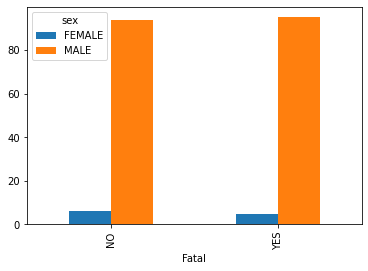

In [57]:
contingencia_sexo.plot(kind='bar', stacked =False)

#### Tabla en porcentajes relativos de ataques según sea fatal o no
Es mas probable que no sea fatal el ataque independientemente de si eres mujer u hombre

In [44]:
contingencia_fatal = pd.crosstab(index=df_hip2["Fatal"], columns=df_hip2["sex"]
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)
contingencia_fatal.round(2)

sex,FEMALE,MALE
Fatal,,
NO,95.92,95.02
YES,4.08,4.98


#### Gráfico de barras de ataques según sea fatal o no

<AxesSubplot:xlabel='Fatal'>

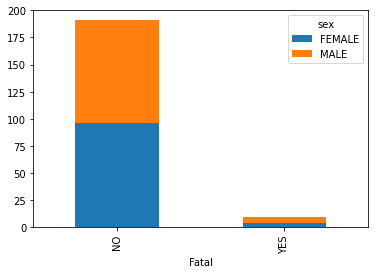

In [53]:
contingencia_fatal.plot(kind='bar', stacked = True)

Podemos llegar a la conclusión de que es más probable que en caso de ataque de tiburón, el daño no sea fatal, y de serlo los hombres corren más riesgos de ser atacado. Añadir que la muestra de hombres es muy superior al de mujeres, al igual que el daño "no fatal" es muy superior a ser "fatal", y por tanto a simple vista se podría haber sacado estas conclusiones.